# Datathon 24 Notebook

Bu notebook Datathon2024 yarışması için hazırlanmıştır.

## Problem Def
    Verilerde Girişimcilik Vakfı'nın 2014 yılından itibaren aldığı başvuruları ve Değerlendirme Puanı isimli kolonu gözlemleyebilirsiniz (train.csv). Bu dosyanın içerisinde aynı zamanda başvuran kişilerin anonim olarak paylaşılmış üniversite, aile detayları, ikamet detayları vb. bir çok bilgiyi gözlemleyebilirsiniz.
    Bu bilgilerden yola çıkarak 11.049  kişinin değerlendirme puanını tahmin etmek (Regression Problemi)
## Evaluation
    Yarışmanın başarısını ölçmek için kullanılacak metrik ise RMSE olacaktır.
## Data
    Veri içerisinde bulunan sütunlar:https : https://www.kaggle.com/competitions/datathon-2024/datan Olunan Üniversite
id
Degerlendirme Puani

### EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [4]:
train_df=pd.read_csv("data/train.csv",low_memory=False)
train_df.head()

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,...,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2014,52.0,Erkek,4/6/1994,"Altindag, Ankara",Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Evet,...,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,0
1,2014,30.0,Erkek,6/11/1993,Üsküdar,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Hayır,...,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,NaN,1
2,2014,18.0,Erkek,1/15/1986,Samsun,İstanbul,ULUSLARARASI KIBRIS ÜNİVERSİTESİ,Özel,100.0,Hayır,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,2
3,2014,40.0,Erkek,6/4/1991,Diyarbakır,İstanbul,İSTANBUL ŞEHİR ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,3
4,2014,24.0,Erkek,2 Kasim 1992,Ankara/Altındağ,Ankara,TURGUT ÖZAL ÜNİVERSİTESİ,Özel,100.0,Evet,...,0,Hayır,NaN,Hayır,Hayır,NaN,NaN,NaN,NaN,4


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65125 entries, 0 to 65124
Data columns (total 44 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Basvuru Yili                                               65125 non-null  int64  
 1   Degerlendirme Puani                                        65124 non-null  float64
 2   Cinsiyet                                                   64956 non-null  object 
 3   Dogum Tarihi                                               64948 non-null  object 
 4   Dogum Yeri                                                 64334 non-null  object 
 5   Ikametgah Sehri                                            63088 non-null  object 
 6   Universite Adi                                             64993 non-null  object 
 7   Universite Turu                                            64870 non-null  object 
 8   Burslu

In [6]:

# Tarih sütununu normalize et ve sadece yıl kısmını al
train_df['Dogum Yili'] = pd.to_datetime(train_df['Dogum Tarihi'], errors='coerce').dt.year

In [7]:
list(train_df["Dogum Tarihi"])

['4/6/1994',
 '6/11/1993',
 '1/15/1986',
 '6/4/1991',
 '2 Kasim 1992',
 '4/14/1992',
 '10/13/1994',
 '3/18/1993',
 '29 Aralik 1991',
 '4/25/1991',
 '7/20/1995',
 '9/27/1993',
 '3/23/1993',
 '8/9/1992',
 '3/5/1992',
 '4/16/1992',
 '7/15/1992',
 '8 Mayis 1995',
 '7/27/1995',
 '7/24/1995',
 '7 Mayis 1994',
 '8/15/1995',
 '1/27/1989',
 '10/5/1992',
 '4/9/1994',
 '6/9/1993',
 '31 Mayis 1992',
 '2/8/1995',
 '1/23/1994',
 '7/23/1994',
 '4/23/1995',
 '4/24/1992',
 '9/24/1993',
 '26 Mayis 1995',
 '24 Mayis 1994',
 '2/13/1992',
 '7/2/1992',
 '29 Aralik 1990',
 '1/12/1995',
 '22 Mayis 1992',
 '8/4/1993',
 '1/10/1990',
 '6/12/1995',
 '28 Mayis 1991',
 '6/12/1995',
 '5 Kasim 1993',
 '9/3/1994',
 '14 Kasim 1993',
 '9/16/1992',
 '9/12/1993',
 '1/25/1993',
 '21 Aralik 1992',
 '2/17/1993',
 '8/29/1993',
 '2/26/1992',
 '3/12/1994',
 '1 Mayis 1993',
 '6/30/1994',
 '2/27/1991',
 '1/11/1993',
 '3/17/1991',
 '9/1/1992',
 '7/13/1994',
 '2/1/1991',
 '8/1/1990',
 '30 Mayis 1992',
 '9/22/1994',
 '1/1/1994',
 '1

In [8]:
null_ratios = train_df.isnull().sum() / len(train_df)
null_ratios_over70=null_ratios[null_ratios>0.70]
null_ratios

Basvuru Yili                                                 0.000000
Degerlendirme Puani                                          0.000015
Cinsiyet                                                     0.002595
Dogum Tarihi                                                 0.002718
Dogum Yeri                                                   0.012146
Ikametgah Sehri                                              0.031278
Universite Adi                                               0.002027
Universite Turu                                              0.003916
Burslu ise Burs Yuzdesi                                      0.655432
Burs Aliyor mu?                                              0.000000
Bölüm                                                        0.003547
Universite Kacinci Sinif                                     0.005743
Universite Not Ortalamasi                                    0.042273
Daha Once Baska Bir Universiteden Mezun Olmus                0.573436
Lise Adi            

In [9]:
def find_categorical_columns(df):
    cat_columns=[]
    for col in df.columns:
        if df[col].dtypes=="O":
            cat_columns.append(col)
    return cat_columns
categorical_cols=find_categorical_columns(train_df)
categorical_cols

['Cinsiyet',
 'Dogum Tarihi',
 'Dogum Yeri',
 'Ikametgah Sehri',
 'Universite Adi',
 'Universite Turu',
 'Burs Aliyor mu?',
 'Bölüm',
 'Universite Kacinci Sinif',
 'Universite Not Ortalamasi',
 'Daha Once Baska Bir Universiteden Mezun Olmus',
 'Lise Adi',
 'Lise Adi Diger',
 'Lise Sehir',
 'Lise Turu',
 'Lise Bolumu',
 'Lise Bolum Diger',
 'Lise Mezuniyet Notu',
 'Baska Bir Kurumdan Burs Aliyor mu?',
 'Burs Aldigi Baska Kurum',
 'Baska Kurumdan Aldigi Burs Miktari',
 'Anne Egitim Durumu',
 'Anne Calisma Durumu',
 'Anne Sektor',
 'Baba Egitim Durumu',
 'Baba Calisma Durumu',
 'Baba Sektor',
 'Kardes Sayisi',
 'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
 'Uye Oldugunuz Kulubun Ismi',
 'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
 'Spor Dalindaki Rolunuz Nedir?',
 'Aktif olarak bir STK üyesi misiniz?',
 "Hangi STK'nin Uyesisiniz?",
 'Stk Projesine Katildiniz Mi?',
 'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
 'Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?',
 'I

<Axes: xlabel='Cinsiyet'>

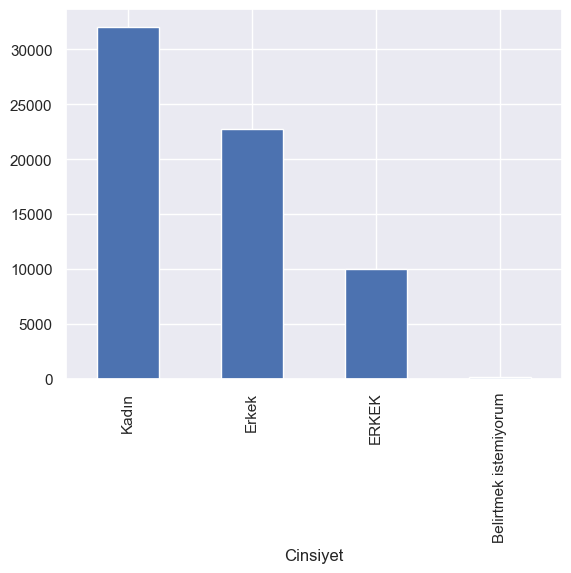

In [33]:
train_df["Cinsiyet"].value_counts().plot.bar()
## iki farklı erkek kategorisi var?

<Axes: xlabel='Universite Turu'>

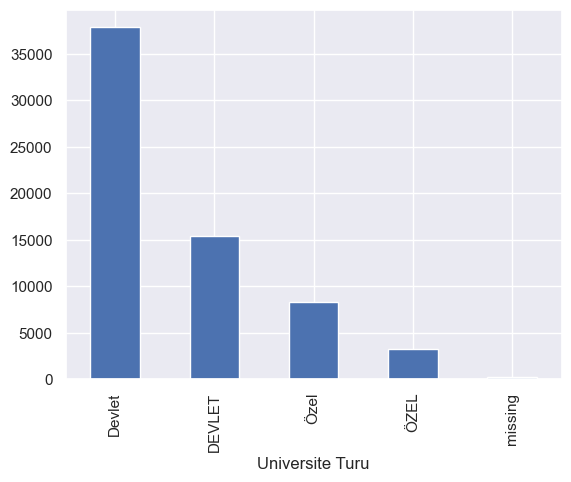

In [11]:
train_df["Universite Turu"].fillna("missing").value_counts().plot.bar()

<Axes: xlabel='Burs Aliyor mu?'>

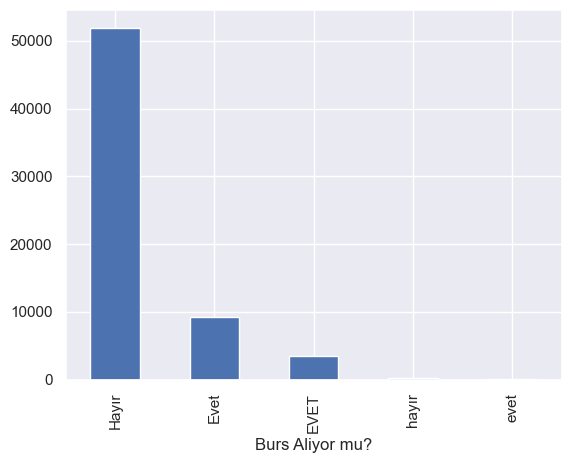

In [12]:
train_df["Burs Aliyor mu?"].value_counts().plot.bar()

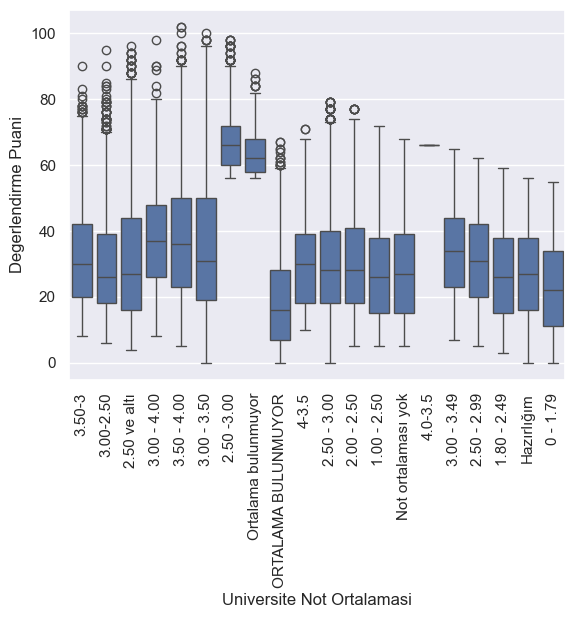

In [13]:
ax=sns.boxplot(data=train_df,x="Universite Not Ortalamasi",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);
# Not ortalamaları düzgün girilmemiş düzeltilecek

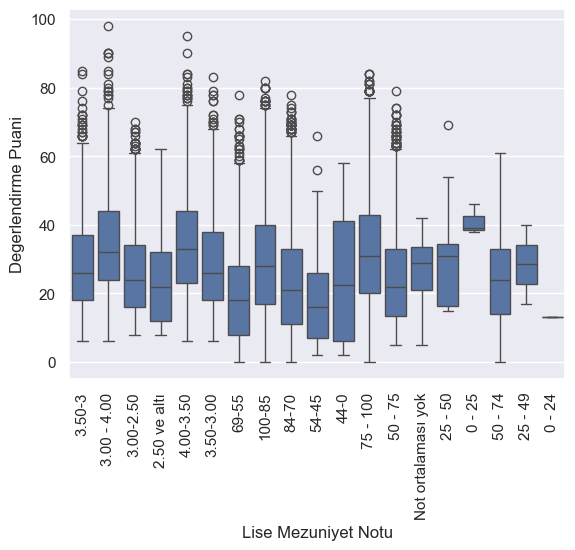

In [14]:
ax=sns.boxplot(data=train_df,x="Lise Mezuniyet Notu",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);
# Not ortalamaları düzgün girilmemiş düzeltilecek

In [15]:
train_df["Universite Kacinci Sinif"].value_counts()

Universite Kacinci Sinif
2                21773
3                16956
4                13113
1                10260
Hazırlık          1275
5                  961
Mezun              178
6                  177
hazırlık            33
Yüksek Lisans       15
Tez                  7
0                    3
Name: count, dtype: int64

In [16]:
train_df["Baska Bir Kurumdan Burs Aliyor mu?"].value_counts()

Baska Bir Kurumdan Burs Aliyor mu?
Hayır    48513
Evet     16381
Name: count, dtype: int64

<Axes: xlabel='Anne Calisma Durumu'>

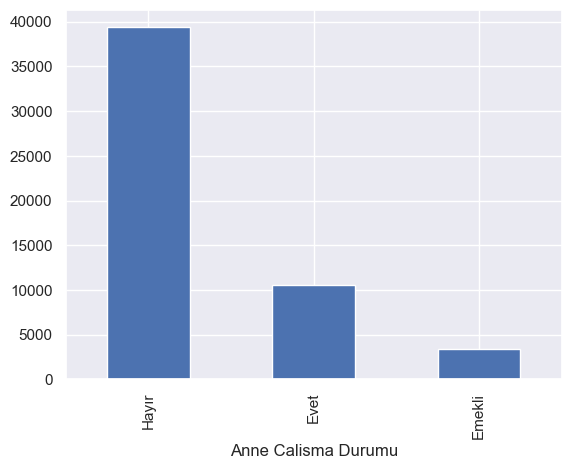

In [17]:
train_df["Anne Calisma Durumu"].value_counts().plot.bar()

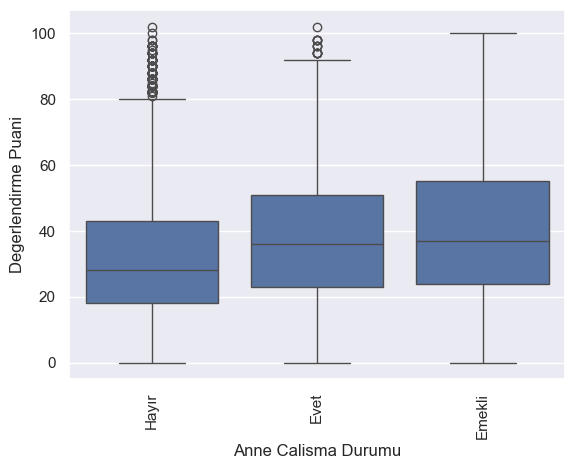

In [18]:
ax=sns.boxplot(data=train_df,x="Anne Calisma Durumu",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

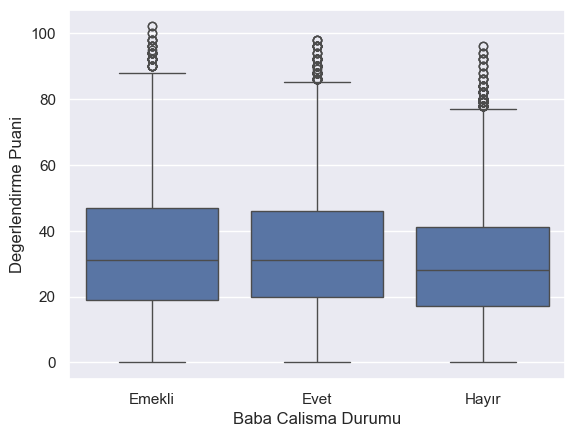

In [19]:
ax=sns.boxplot(data=train_df,x="Baba Calisma Durumu",y="Degerlendirme Puani",linewidth=1)

In [20]:
train_df["Kardes Sayisi"].value_counts()
# Kardeş sayısının "." dan öncekileri alıp integer veri tipine dönüştür

Kardes Sayisi
1.0                                             16186
2.0                                             13062
3.0                                              6734
1                                                6054
4.0                                              4611
2                                                3938
0.0                                              3701
5.0                                              3421
3                                                2087
0                                                1381
4                                                 998
5                                                 715
6.0                                               206
7.0                                               159
6                                                 135
10.0                                              127
7                                                 119
8.0                                                98
9.0           

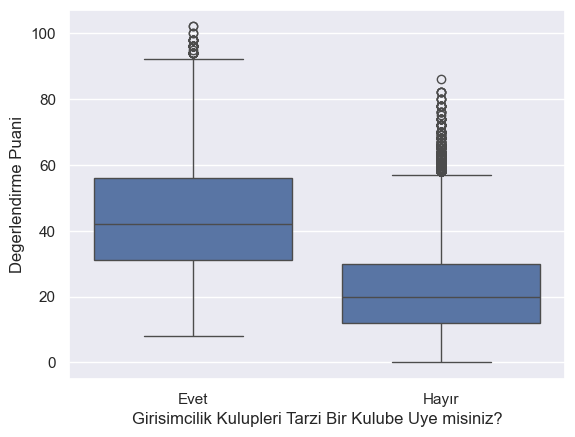

In [21]:
ax=sns.boxplot(data=train_df,x="Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?",y="Degerlendirme Puani",linewidth=1)
# Önemli bir etken

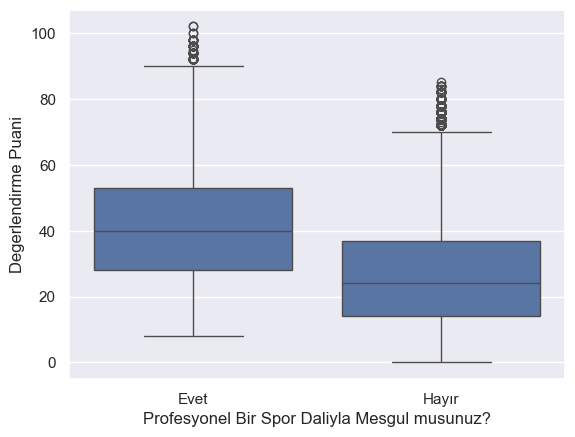

In [22]:
ax=sns.boxplot(data=train_df,x="Profesyonel Bir Spor Daliyla Mesgul musunuz?",y="Degerlendirme Puani",linewidth=1)
# Önemli bir etken

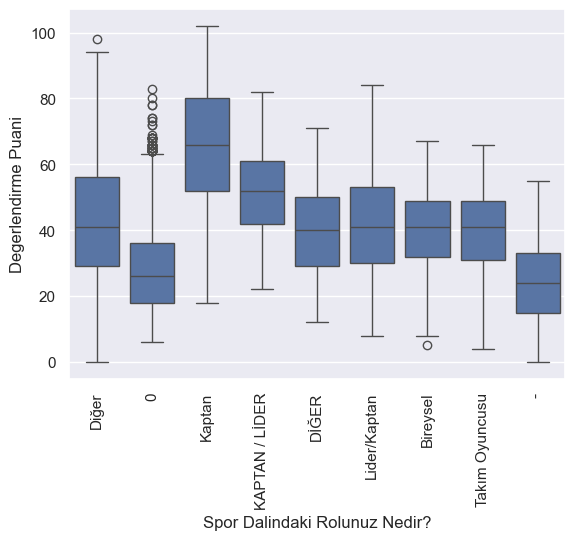

In [23]:
ax=sns.boxplot(data=train_df,x="Spor Dalindaki Rolunuz Nedir?",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

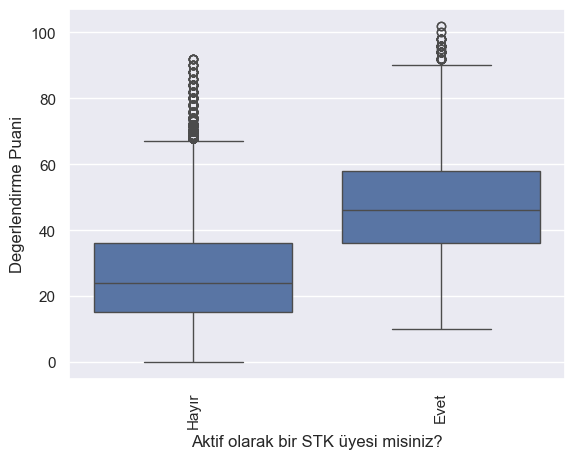

In [24]:
ax=sns.boxplot(data=train_df,x="Aktif olarak bir STK üyesi misiniz?",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

Object `Mi` not found.


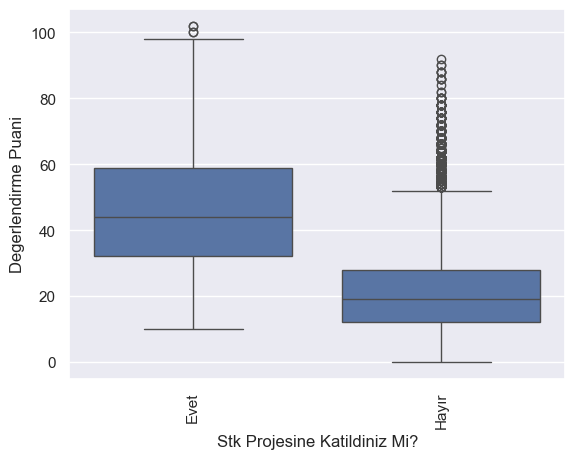

In [29]:
Stk Projesine Katildiniz Mi?
ax=sns.boxplot(data=train_df,x="Stk Projesine Katildiniz Mi?",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

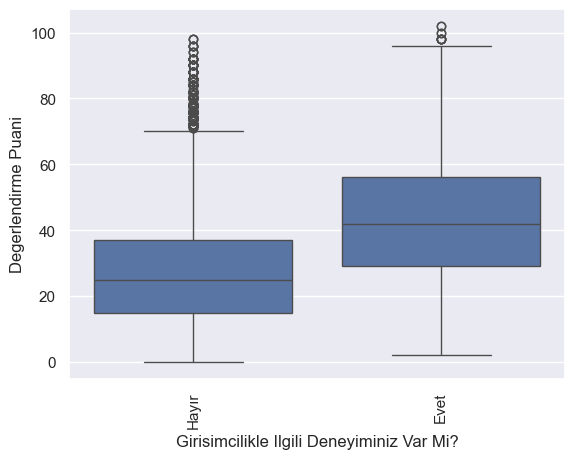

In [25]:
ax=sns.boxplot(data=train_df,x="Girisimcilikle Ilgili Deneyiminiz Var Mi?",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

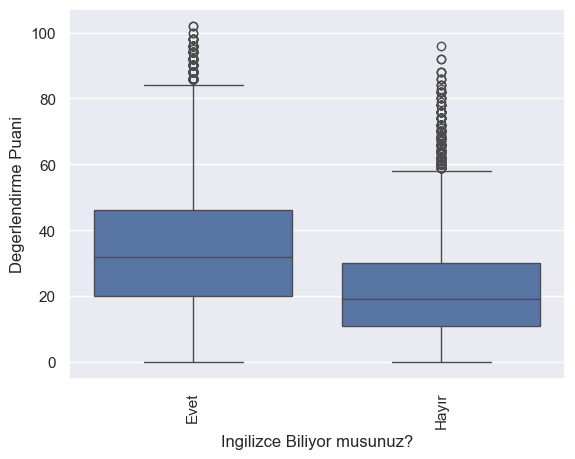

In [34]:
ax=sns.boxplot(data=train_df,x="Ingilizce Biliyor musunuz?",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

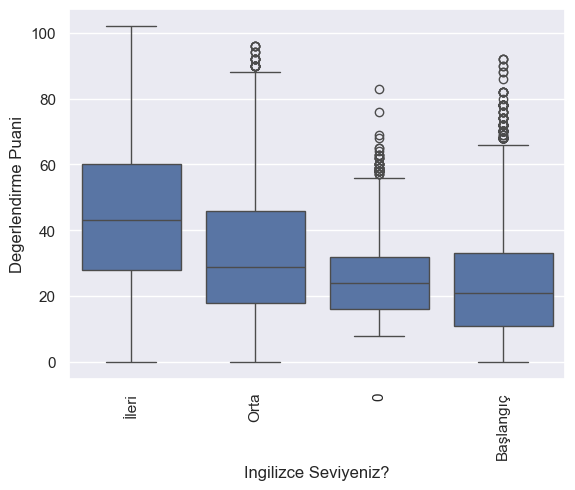

In [35]:
ax=sns.boxplot(data=train_df,x="Ingilizce Seviyeniz?",y="Degerlendirme Puani",linewidth=1)
plt.xticks(rotation=90);

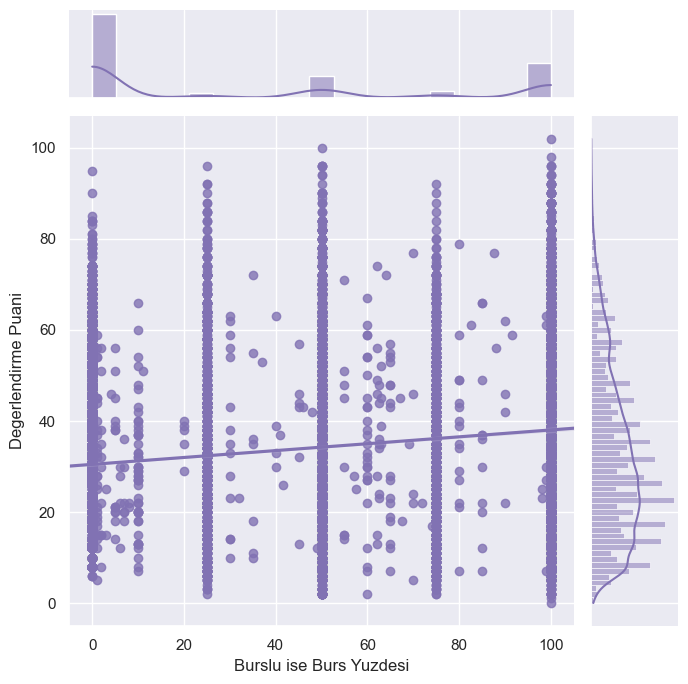

In [28]:
g = sns.jointplot(x="Burslu ise Burs Yuzdesi", y="Degerlendirme Puani", data=train_df,
                  kind="reg", truncate=False,                  
                  color="m", height=7)

In [38]:
box_plot_columns=["Universite Not Ortalamasi","Lise Mezuniyet Notu","Anne Calisma Durumu","Baba Calisma Durumu","Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"
                 ,"Profesyonel Bir Spor Daliyla Mesgul musunuz?","Spor Dalindaki Rolunuz Nedir?","Aktif olarak bir STK üyesi misiniz?","Stk Projesine Katildiniz Mi?","Girisimcilikle Ilgili Deneyiminiz Var Mi?",
                 "Ingilizce Biliyor musunuz?","Ingilizce Seviyeniz?"]


In [ ]:
def plot_box_plot(col,df):
    n_rows=4,
    n_cols=3
    fig,ax=
    